PROJECT CNN

In [2]:
#function to load (matlab)data
from scipy.io import loadmat

In [3]:
#Load data

train_data= loadmat('train_32x32.mat')
test_data= loadmat('test_32x32.mat')

In [4]:
print(train_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [5]:
#Extract images and labels from data
x_train,y_train=train_data["X"],train_data["y"]
x_test,y_test=test_data["X"],test_data["y"]

In [6]:
print("training set",x_train.shape,y_train.shape)
print("test set",x_test.shape,y_test.shape)

training set (32, 32, 3, 73257) (73257, 1)
test set (32, 32, 3, 26032) (26032, 1)


In [7]:
#change the format according to deeplearning by transpose
x_train=x_train.transpose((3,0,1,2))
x_test=x_test.transpose((3,0,1,2))

In [8]:
print(x_train.shape)
print(x_test.shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)


In [9]:
x_train[0].shape

(32, 32, 3)

Preprocessing

In [10]:
# Normalize pixel values (scale to range [0,1])
x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
# Adjust labels to be in the range 0-9 (currently they are 1-10)
y_train = y_train - 1
y_test = y_test - 1

In [13]:
from keras.utils import to_categorical


In [14]:
# One-hot encode the labels (required for categorical crossentropy)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
# Data augmentation to increase the diversity of the training set
datagen = ImageDataGenerator(
    rotation_range=10,        # Randomly rotate images by 10 degrees
    zoom_range=0.2,           # Randomly zoom images by 20%
    horizontal_flip=True      # Randomly flip images horizontally
)
datagen.fit(x_train)

Build the CNN Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [23]:
model = Sequential([
    # First Convolutional Layer with 32 filters, 3x3 kernel, and ReLU activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),  # Max Pooling layer

    # Second Convolutional Layer with 64 filters
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),  # Max Pooling layer

    Flatten(),  # Flatten the input for the fully connected layers

    # Fully connected layer with 128 neurons and ReLU activation
    Dense(128, activation='relu'),

    # Output layer with 10 neurons (one for each class) and softmax activation
    Dense(10, activation='softmax')
])

C:\Users\Shabi Syed\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 Compile the Model

In [24]:
# Use 'adam' optimizer and 'categorical_crossentropy' loss function for multi-class classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train the Model

In [25]:
# Train the model using the data generator
model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


C:\Users\Shabi Syed\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 229s 188ms/step - accuracy: 0.3754 - loss: 1.7877 - val_accuracy: 0.7198 - val_loss: 0.9483
Epoch 2/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 131s 114ms/step - accuracy: 0.7304 - loss: 0.8798 - val_accuracy: 0.7642 - val_loss: 0.8023
Epoch 3/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 133s 116ms/step - accuracy: 0.7666 - loss: 0.7637 - val_accuracy: 0.7815 - val_loss: 0.7346
Epoch 4/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 112s 98ms/step - accuracy: 0.7841 - loss: 0.7053 - val_accuracy: 0.8004 - val_loss: 0.6840
Epoch 5/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 119s 104ms/step - accuracy: 0.8042 - loss: 0.6390 - val_accuracy: 0.8172 - val_loss: 0.6290
Epoch 6/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 135s 117ms/step - accuracy: 0.8155 - loss: 0.6020 - val_accuracy: 0.8290 - val_loss: 0.5833
Epoch 7/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 124s 108ms/step - accuracy: 0.8266 - loss: 0.5715 - val_accuracy: 0.8277 - val_loss: 0.5817
Epoch 8/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 127s 111ms/step - accuracy: 0.83

Evaluate the Model

In [28]:
# Evaluate the model's performance on the test dataset
score = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {score[1]}")

814/814 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8501 - loss: 0.5174
Test Accuracy: 0.8516057133674622


Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# Predict on the test set
y_pred = model.predict(x_test)

814/814 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step


In [31]:
# Generate confusion matrix
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

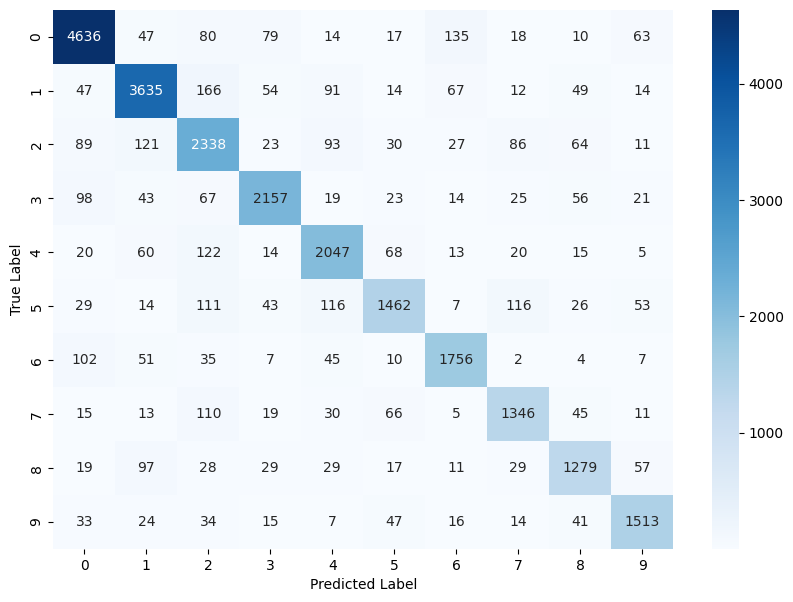

In [32]:
# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [1]:
#this is all all it